Note: haven't had the time to clean it up yet, sorry. Will be ready by tomorrow (with all the links and comments).

This jupyter notebook accompanies [the paper](link) on price discovery of BTC. The structure is as follows, first the data is presented and cleaned, then the neccesary computations are made.

The data on the exchanges can be downloaded from Dropbox:
- [GDAX]()
- [Kraken]()
- [BitMEX]()
- [Bitfinex]()
- [Cex]()
- [HitBTC]()
- [Gemini]()

explain magic

In [ ]:
# change this parameters if neccesary
%matplotlib inline # output the plot right below the corresponding cell
%config InlineBackend.figure_format = "retina" # make the plots not blurry
# %config InlineBackend.figure_format = "svg"

In [342]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

tell more about the libs

In [344]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import datetime
import dateutil.parser

sns.set(style="darkgrid")

GDAX

In [ ]:
gdax = pd.read_csv("~/Desktop/gdax.csv", index_col="trade_id").sort_index()

In [10]:
# create a datetime feild for each exchange
# to make synscronization simpler later
gdax["datetime"] = gdax["time"].map(
    lambda time: dateutil.parser.parse(time)
)

In [12]:
# to calculate the share of the market for each exchange
gdax["volume"] = np.abs(gdax["size"]) * gdax.price

In [13]:
gdax.head()

,time,price,size,side,datetime,volume
trade_id,,,,,,
10000001,2016-07-07T01:50:10.535246Z,682.40,0.020015,buy,2016-07-07 01:50:10.535246+00:00,13.657997
10000002,2016-07-07T01:50:10.535408Z,682.37,0.025000,buy,2016-07-07 01:50:10.535408+00:00,17.059250
10000003,2016-07-07T01:50:10.535707Z,682.30,0.020015,buy,2016-07-07 01:50:10.535707+00:00,13.656003
10000004,2016-07-07T01:50:10.535871Z,682.29,0.025000,buy,2016-07-07 01:50:10.535871+00:00,17.057250
10000005,2016-07-07T01:50:10.536034Z,682.27,0.012000,buy,2016-07-07 01:50:10.536034+00:00,8.187240


In [14]:
gdax.tail()

,time,price,size,side,datetime,volume
trade_id,,,,,,
16603996,2017-06-12T03:56:07.168Z,2986.43,0.013443,sell,2017-06-12 03:56:07.168000+00:00,40.145742
16603997,2017-06-12T03:56:08.775Z,2986.43,0.659430,sell,2017-06-12 03:56:08.775000+00:00,1969.342700
16603998,2017-06-12T03:56:11.681Z,2986.43,0.043924,sell,2017-06-12 03:56:11.681000+00:00,131.177385
16603999,2017-06-12T03:56:12.366Z,2986.43,0.033056,sell,2017-06-12 03:56:12.366000+00:00,98.720117
16604000,2017-06-12T03:56:17.622Z,2986.43,0.300146,sell,2017-06-12 03:56:17.622000+00:00,896.365556


In [15]:
# group trades in 5min intervals taking the last price for each interval
gdax_5min = gdax.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [37]:
gdax_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00+00:00    573.14
2016-09-01 00:05:00+00:00    573.25
2016-09-01 00:10:00+00:00    572.69
2016-09-01 00:15:00+00:00    573.10
2016-09-01 00:20:00+00:00    573.15
Freq: 5T, Name: price, dtype: float64

In [38]:
gdax_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 23:35:00+00:00    2716.18
2017-06-07 23:40:00+00:00    2719.60
2017-06-07 23:45:00+00:00    2710.51
2017-06-07 23:50:00+00:00    2700.00
2017-06-07 23:55:00+00:00    2685.64
Freq: 5T, Name: price, dtype: float64

In [39]:
# number of observasions (intervals) for gdax
# for the period of interest
gdax_5min["2016-09-01":"2017-06-07"].count() 

80307

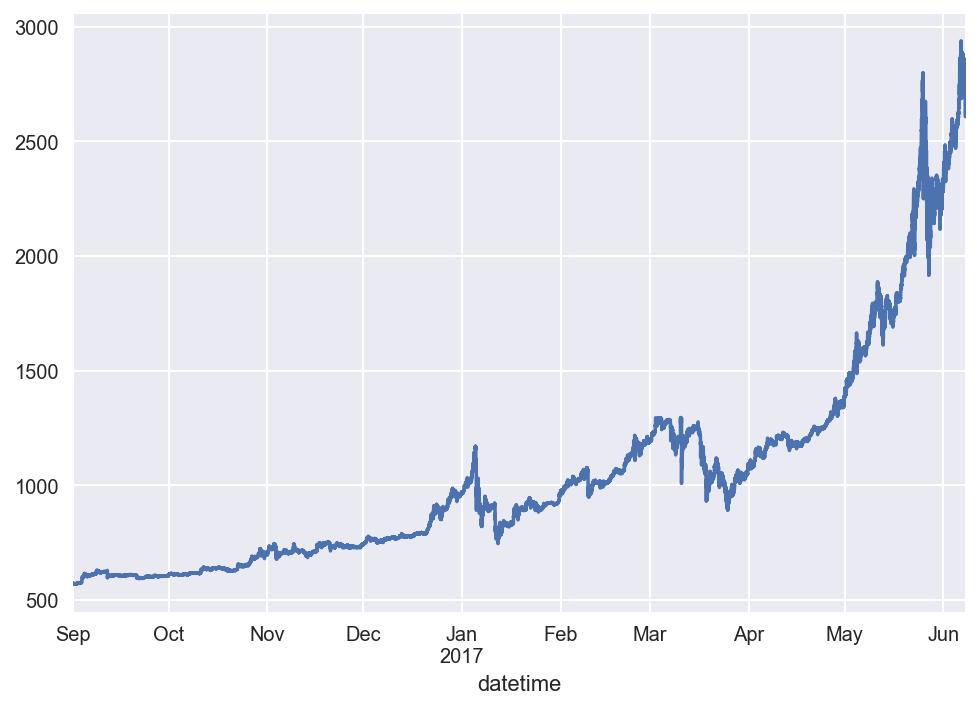

In [40]:
gdax_5min["2016-09-01":"2017-06-07"].plot()

Kraken

In [22]:
kraken = pd.read_csv("~/Desktop/kraken.csv")

In [27]:
kraken["datetime"] = kraken["time"].map(
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp)
)

In [29]:
kraken["size"] = kraken["volume"]
kraken["volume"] = np.abs(kraken["size"]) * kraken.price

In [30]:
kraken.head()

,price,volume,time,buy/sell,market/limit,miscellaneous,datetime,size
0,122.00,12.20000,1.381095e+09,s,l,NaN,2013-10-07 01:34:15.551400,0.1000
1,123.61,12.36100,1.381179e+09,s,l,NaN,2013-10-08 00:50:30.481500,0.1000
2,123.91,123.91000,1.381201e+09,s,l,NaN,2013-10-08 06:58:35.641000,1.0000
3,123.90,122.85924,1.381201e+09,s,l,NaN,2013-10-08 06:58:35.656700,0.9916
4,124.19,124.19000,1.381210e+09,s,l,NaN,2013-10-08 09:26:44.100100,1.0000


In [31]:
kraken.tail()

,price,volume,time,buy/sell,market/limit,miscellaneous,datetime,size
1680949,2755.000,3.441849,1.496953e+09,s,m,NaN,2017-06-08 23:22:16.177100,0.001249
1680950,2755.000,4.585257,1.496953e+09,s,m,NaN,2017-06-08 23:22:16.184400,0.001664
1680951,2757.613,496.063032,1.496953e+09,s,l,NaN,2017-06-08 23:22:23.896600,0.179889
1680952,2757.610,242.669680,1.496953e+09,b,l,NaN,2017-06-08 23:23:11.694300,0.088000
1680953,2757.610,173.453669,1.496953e+09,b,l,NaN,2017-06-08 23:23:11.730700,0.062900


In [32]:
kraken_5min = kraken.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [41]:
kraken_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00    574.45
2016-09-01 00:05:00    574.45
2016-09-01 00:10:00       NaN
2016-09-01 00:15:00    574.45
2016-09-01 00:20:00    574.45
Freq: 5T, Name: price, dtype: float64

In [42]:
kraken_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 23:35:00    2770.001
2017-06-07 23:40:00    2761.271
2017-06-07 23:45:00    2758.724
2017-06-07 23:50:00    2746.989
2017-06-07 23:55:00    2737.838
Freq: 5T, Name: price, dtype: float64

In [43]:
kraken_5min["2016-09-01":"2017-06-07"].count()

67453

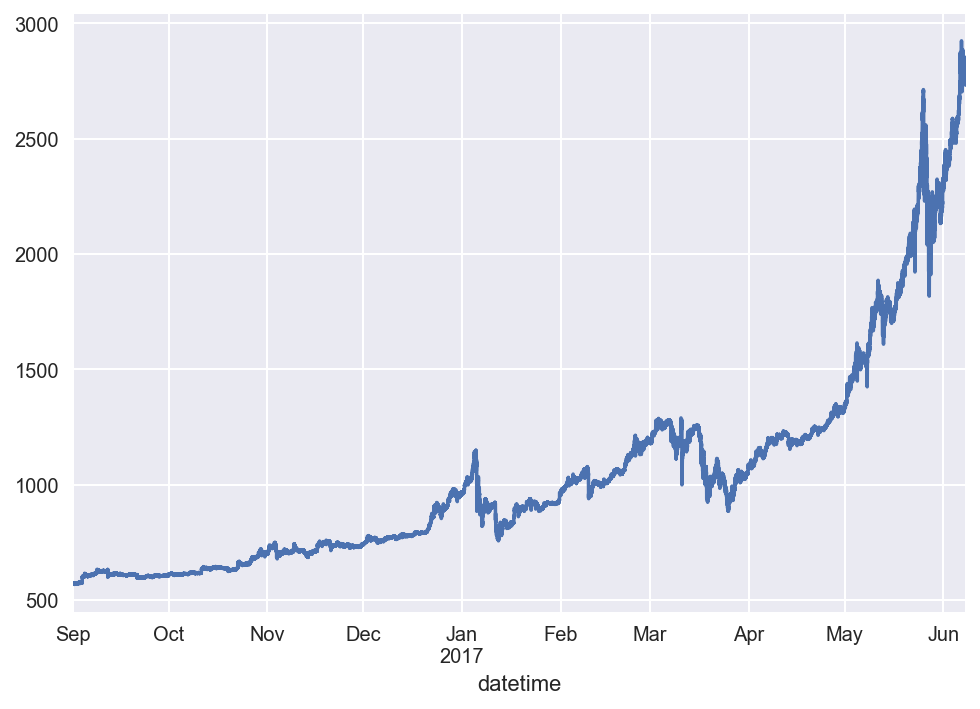

In [44]:
kraken_5min["2016-09-01":"2017-06-07"].plot()

BitMEX

In [47]:
bitmex = pd.read_csv("/Users/asd/Desktop/bitmex.csv")
bitmex = bitmex[bitmex.symbol == "XBTUSD"] # there are some derivatives in the csv file

In [49]:
def convert_bitmex(timestamp):
    try:
        return datetime.datetime.strptime(timestamp[:-3], "%Y-%m-%dD%H:%M:%S.%f")
    except:
        return datetime.datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S.%fZ")
    
bitmex["datetime"] = bitmex["timestamp"].map(
    lambda timestamp: convert_bitmex(timestamp)
)

In [50]:
bitmex["volume"] = np.abs(bitmex.foreignNotional)

In [51]:
bitmex.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,datetime,volume
0,2016-01-01D00:06:27.332542000,XBTUSD,Buy,100,430.50,MinusTick,504600ac-b41a-d5df-90a3-63ff5584deed,43050000.0,0.430500,185.330250,2016-01-01 00:06:27.332542,185.330250
1,2016-01-01D00:09:03.887631000,XBTUSD,Sell,100,430.88,PlusTick,0eea5a94-5901-9e88-1902-7d3c2f7e566c,43088000.0,0.430880,185.657574,2016-01-01 00:09:03.887631,185.657574
2,2016-01-01D00:09:03.887631000,XBTUSD,Sell,292,430.87,MinusTick,0d78aae6-ae51-a34f-593b-f9db3ff80d76,125814040.0,1.258140,542.094954,2016-01-01 00:09:03.887631,542.094954
3,2016-01-01D00:29:16.273988000,XBTUSD,Buy,608,430.86,MinusTick,15a5a490-b18a-72a0-a7ea-5940472403cf,261962880.0,2.619629,1128.693265,2016-01-01 00:29:16.273988,1128.693265
4,2016-01-01D00:33:38.645539000,XBTUSD,Sell,292,431.00,PlusTick,725298a4-5518-1a73-35ef-83323e45a9a8,125852000.0,1.258520,542.422120,2016-01-01 00:33:38.645539,542.422120


In [52]:
bitmex.tail()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,datetime,volume
4661922,2017-06-09T20:07:28.188Z,XBTUSD,Buy,997,2825.1,ZeroPlusTick,1f0eb2a1-ac05-b785-a1d1-4523de89bb92,35290809.0,0.352908,997.0,2017-06-09 20:07:28.188,997.0
4661923,2017-06-09T20:07:28.188Z,XBTUSD,Buy,1367,2825.1,PlusTick,0fee5c67-dfc3-2428-1271-12f16c770617,48387699.0,0.483877,1367.0,2017-06-09 20:07:28.188,1367.0
4661924,2017-06-09T20:07:28.188Z,XBTUSD,Buy,5000,2825.1,ZeroPlusTick,8c899ac9-6971-6558-974c-26835658735c,176985000.0,1.769850,5000.0,2017-06-09 20:07:28.188,5000.0
4661925,2017-06-09T20:07:28.188Z,XBTUSD,Buy,3000,2825.1,ZeroPlusTick,b24ed92b-745d-fa18-dd01-46f7bb1cccd9,106191000.0,1.061910,3000.0,2017-06-09 20:07:28.188,3000.0
4661926,2017-06-09T20:07:28.188Z,XBTUSD,Buy,997,2825.1,ZeroPlusTick,1f0eb2a1-ac05-b785-a1d1-4523de89bb92,35290809.0,0.352908,997.0,2017-06-09 20:07:28.188,997.0


In [53]:
bitmex_5min = bitmex.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [54]:
bitmex_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00       NaN
2016-09-01 00:05:00    573.23
2016-09-01 00:10:00       NaN
2016-09-01 00:15:00       NaN
2016-09-01 00:20:00    573.20
Freq: 5T, Name: price, dtype: float64

In [55]:
bitmex_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 23:35:00    2702.8
2017-06-07 23:40:00    2704.0
2017-06-07 23:45:00    2687.3
2017-06-07 23:50:00    2690.3
2017-06-07 23:55:00    2667.6
Freq: 5T, Name: price, dtype: float64

In [58]:
bitmex_5min["2016-09-01":"2017-06-07"].count()

68024

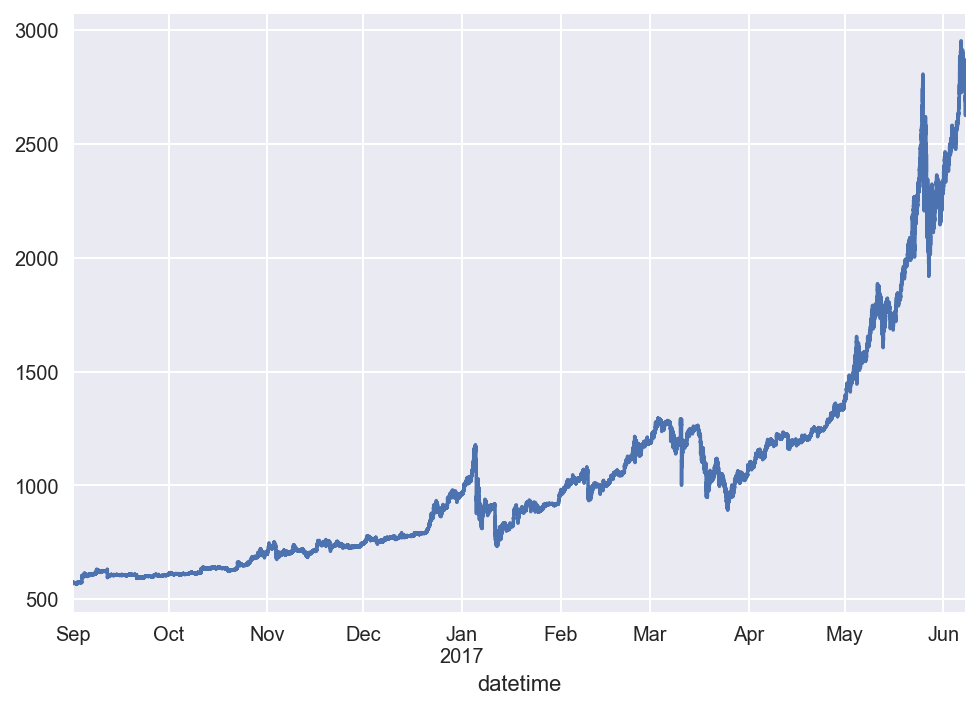

In [59]:
bitmex_5min["2016-09-01":"2017-06-07"].plot()

Bitfinex

In [ ]:
bitfinex = pd.read_csv("~/Desktop/bitfinex.csv", index_col="trade_id").sort_index()

In [61]:
bitfinex["datetime"] = bitfinex["timestamp"].map(
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp / 1000)
)

In [62]:
bitfinex["volume"] = np.abs(bitfinex.amount) * bitfinex.price

In [63]:
bitfinex.head()

,timestamp,amount,price,datetime,volume
trade_id,,,,,
14808543,1452212320000,14.490000,458.49,2016-01-08 03:18:40,6643.520100
14808545,1452212320000,3.000000,458.48,2016-01-08 03:18:40,1375.440000
14808547,1452212320000,9.978164,458.47,2016-01-08 03:18:40,4574.688900
14808549,1452212320000,10.000000,458.20,2016-01-08 03:18:40,4582.000000
14808551,1452212320000,16.903900,458.35,2016-01-08 03:18:40,7747.902565


In [64]:
bitfinex.tail()

,timestamp,amount,price,datetime,volume
trade_id,,,,,
36884104,1497273024000,0.585149,2679.100000,2017-06-12 16:10:24,1567.672713
36884112,1497273029000,0.055711,2669.284183,2017-06-12 16:10:29,148.707904
36884113,1497273029000,1.597000,2669.200000,2017-06-12 16:10:29,4262.712400
36884115,1497273029000,1.780416,2669.284183,2017-06-12 16:10:29,4752.436348
36884119,1497273031000,-0.050000,2669.100000,2017-06-12 16:10:31,133.455000


In [65]:
bitfinex_5min = bitfinex.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [67]:
bitfinex_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00    575.73
2016-09-01 00:05:00    575.73
2016-09-01 00:10:00    575.73
2016-09-01 00:15:00    575.72
2016-09-01 00:20:00    575.72
Freq: 5T, Name: price, dtype: float64

In [68]:
bitfinex_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 23:35:00    2738.9
2017-06-07 23:40:00    2731.2
2017-06-07 23:45:00    2720.0
2017-06-07 23:50:00    2709.4
2017-06-07 23:55:00    2700.2
Freq: 5T, Name: price, dtype: float64

In [69]:
bitfinex_5min["2016-09-01":"2017-06-07"].count()

77652

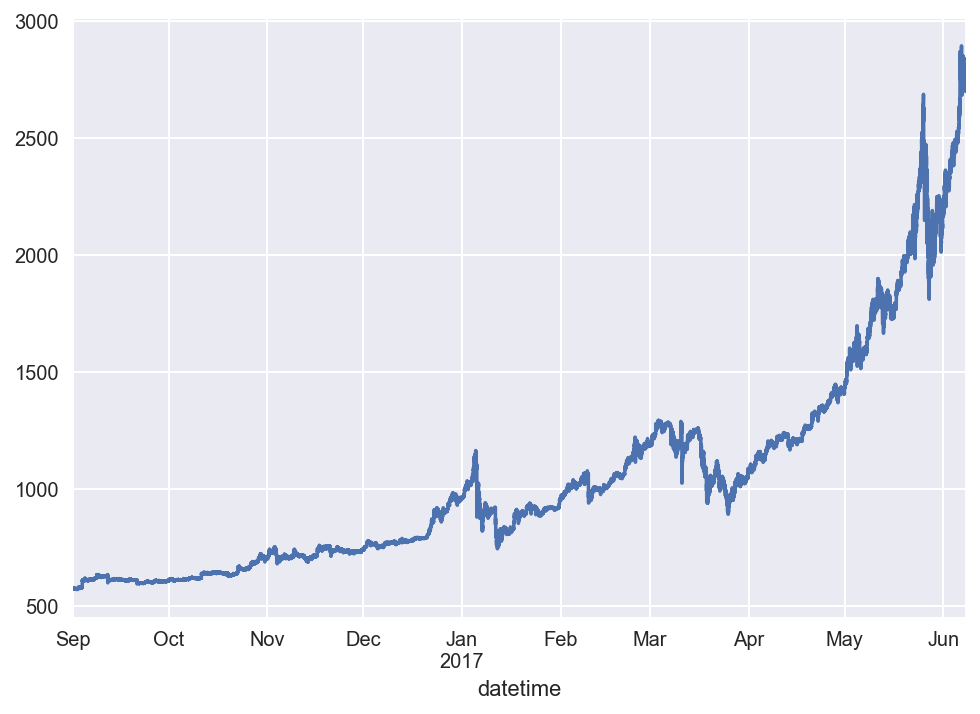

In [70]:
bitfinex_5min["2016-09-01":"2017-06-07"].plot()

Cex

In [ ]:
cex = pd.read_csv("~/Desktop/cex.csv", index_col="tid").sort_index()

In [75]:
cex["datetime"] = cex["date"].map(
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp)
)

In [76]:
cex["volume"] = np.abs(cex.amount) * cex.price

In [77]:
cex.head()

,type,date,amount,price,datetime,volume
tid,,,,,,
1000001,buy,1462746613,0.220800,464.0447,2016-05-09 01:30:13,102.461070
1000002,buy,1462746613,0.187003,464.5400,2016-05-09 01:30:13,86.870281
1000003,buy,1462746613,0.112997,464.5500,2016-05-09 01:30:13,52.492849
1000004,sell,1462746636,0.103900,464.2283,2016-05-09 01:30:36,48.233320
1000005,sell,1462746708,0.207800,464.0510,2016-05-09 01:31:48,96.429798


In [78]:
cex.tail()

,type,date,amount,price,datetime,volume
tid,,,,,,
2486469,sell,1497281257,0.011000,2912.6903,2017-06-12 18:27:37,32.039593
2486470,sell,1497281257,0.002105,2912.6899,2017-06-12 18:27:37,6.130746
2486471,buy,1497281261,0.011000,2918.9972,2017-06-12 18:27:41,32.108969
2486472,buy,1497281261,0.040000,2918.9973,2017-06-12 18:27:41,116.759892
2486473,buy,1497281261,0.050507,2918.9975,2017-06-12 18:27:41,147.429982


In [79]:
cex_5min = cex.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [80]:
cex_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00    584.0001
2016-09-01 00:05:00    584.7630
2016-09-01 00:10:00    585.7029
2016-09-01 00:15:00    586.1230
2016-09-01 00:20:00    586.2000
Freq: 5T, Name: price, dtype: float64

In [81]:
cex_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 23:35:00    2823.1556
2017-06-07 23:40:00    2836.5203
2017-06-07 23:45:00    2824.1206
2017-06-07 23:50:00    2811.4304
2017-06-07 23:55:00    2804.3668
Freq: 5T, Name: price, dtype: float64

In [82]:
cex_5min["2016-09-01":"2017-06-07"].count()

74276

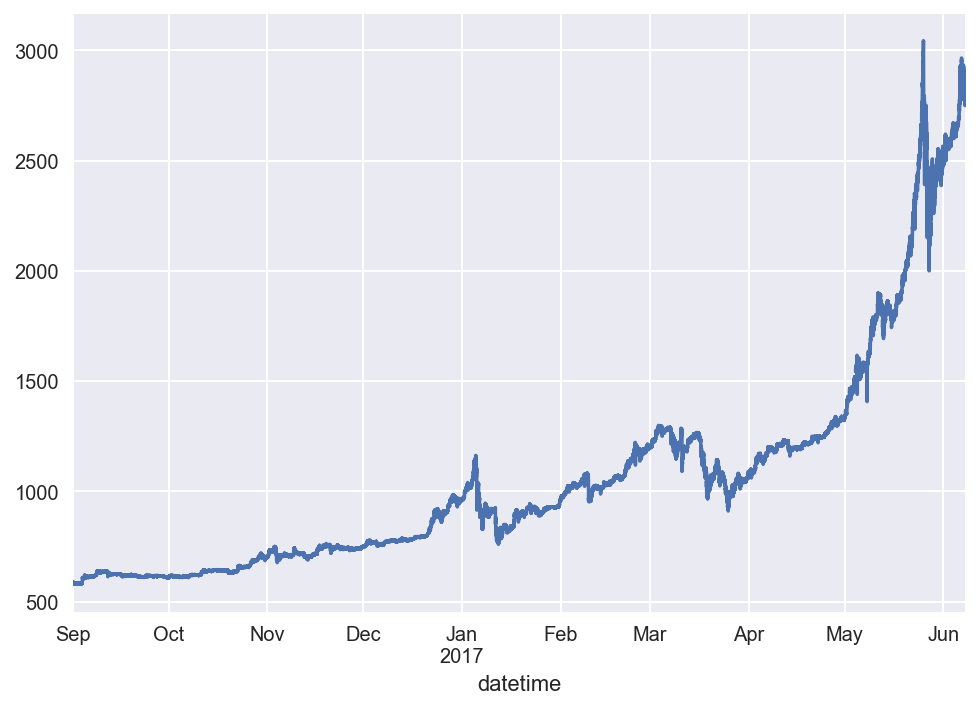

In [83]:
cex_5min["2016-09-01":"2017-06-07"].plot()

HitBTC

In [ ]:
hitbtc = pd.read_csv("~/Desktop/hitbtc.csv", index_col="tid").sort_index()

In [85]:
hitbtc["datetime"] = hitbtc["date"].map(
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp / 1000)
)

In [86]:
hitbtc["volume"] = np.abs(hitbtc.amount) * hitbtc.price

In [87]:
hitbtc.head()

,date,price,amount,side,datetime,volume
tid,,,,,,
1,1388132617402,777.0,0.1,sell,2013-12-27 12:23:37.402,77.7
2,1388132646898,778.0,0.2,sell,2013-12-27 12:24:06.898,155.6
3,1388132736862,778.0,0.2,sell,2013-12-27 12:25:36.862,155.6
4,1388132738816,777.0,0.1,sell,2013-12-27 12:25:38.816,77.7
5,1388132800359,778.0,0.4,buy,2013-12-27 12:26:40.359,311.2


In [88]:
hitbtc.tail()

,date,price,amount,side,datetime,volume
tid,,,,,,
11140302,1496849552854,2730.00,0.01,sell,2017-06-07 18:32:32.854,27.3000
11140413,1496849762285,2720.04,0.01,buy,2017-06-07 18:36:02.285,27.2004
11140431,1496849808654,2736.89,0.01,buy,2017-06-07 18:36:48.654,27.3689
11140536,1496850118718,2745.78,0.02,buy,2017-06-07 18:41:58.718,54.9156
11140549,1496850135926,2748.86,0.01,buy,2017-06-07 18:42:15.926,27.4886


In [89]:
hitbtc_5min = hitbtc.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [90]:
hitbtc_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00    574.42
2016-09-01 00:05:00       NaN
2016-09-01 00:10:00    570.27
2016-09-01 00:15:00    574.58
2016-09-01 00:20:00    569.88
Freq: 5T, Name: price, dtype: float64

In [91]:
hitbtc_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 18:20:00    2789.23
2017-06-07 18:25:00    2742.86
2017-06-07 18:30:00    2730.00
2017-06-07 18:35:00    2736.89
2017-06-07 18:40:00    2748.86
Freq: 5T, Name: price, dtype: float64

In [92]:
# might want to exclude this one, too many NaNs
hitbtc_5min["2016-09-01":"2017-06-07"].count()

25243

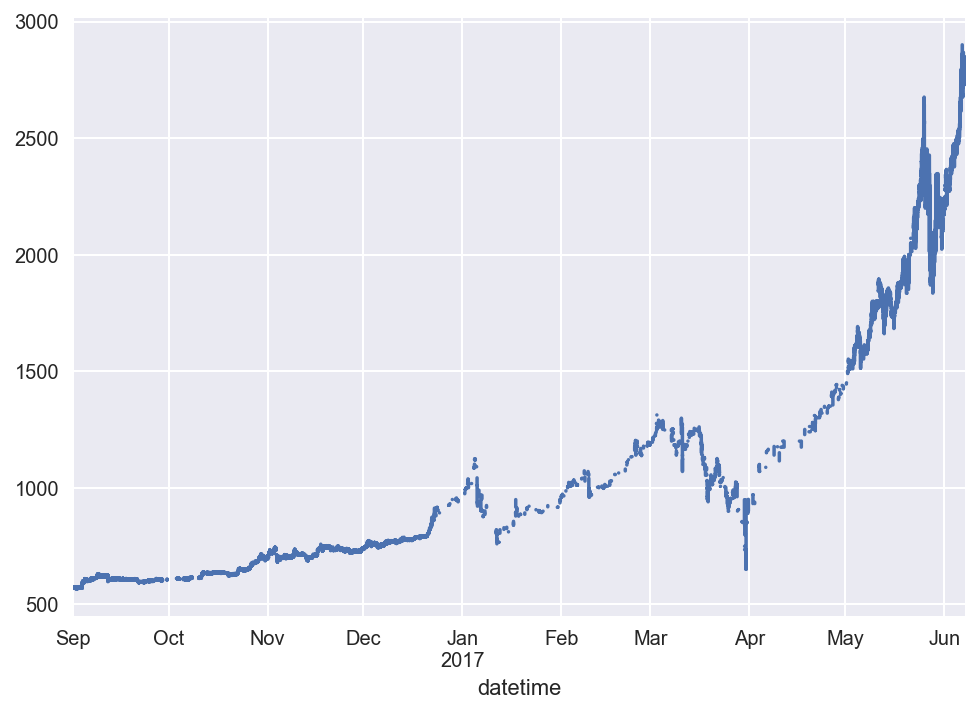

In [93]:
hitbtc_5min["2016-09-01":"2017-06-07"].plot()

Gemini

In [ ]:
gemini = pd.read_csv("~/Desktop/gemini.csv", index_col="tid").sort_index()

In [97]:
gemini["datetime"] = gemini["timestampms"].map(
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp / 1000)
)

In [99]:
gemini["volume"] = np.abs(gemini.amount) * gemini.price

In [100]:
gemini.head()

,timestamp,timestampms,price,amount,exchange,type,datetime,volume
tid,,,,,,,,
343,1444311607,1444311607801,242.50,0.050000,gemini,sell,2015-10-08 16:40:07.801,12.125000
377,1444311695,1444311695572,242.95,0.001000,gemini,sell,2015-10-08 16:41:35.572,0.242950
400,1444311821,1444311821936,242.96,0.010000,gemini,buy,2015-10-08 16:43:41.936,2.429600
407,1444311854,1444311854951,242.96,0.033491,gemini,sell,2015-10-08 16:44:14.951,8.137003
423,1444312006,1444312006823,242.96,0.004000,gemini,sell,2015-10-08 16:46:46.823,0.971840


In [101]:
gemini.tail()

,timestamp,timestampms,price,amount,exchange,type,datetime,volume
tid,,,,,,,,
724964396,1496932043,1496932043525,2754.52,0.134600,gemini,sell,2017-06-08 17:27:23.525,370.758392
724964909,1496932051,1496932051411,2754.53,0.100000,gemini,buy,2017-06-08 17:27:31.411,275.453000
724965208,1496932058,1496932058534,2754.53,0.963766,gemini,buy,2017-06-08 17:27:38.534,2654.721892
724965210,1496932058,1496932058534,2754.53,5.367600,gemini,buy,2017-06-08 17:27:38.534,14785.215228
724965212,1496932058,1496932058534,2754.53,3.668634,gemini,buy,2017-06-08 17:27:38.534,10105.362880


In [102]:
gemini_5min = gemini.set_index("datetime").groupby(pd.TimeGrouper("5Min"))["price"].last()

In [103]:
gemini_5min["2016-09-01":"2017-06-07"].head()

datetime
2016-09-01 00:00:00       NaN
2016-09-01 00:05:00       NaN
2016-09-01 00:10:00       NaN
2016-09-01 00:15:00    574.39
2016-09-01 00:20:00       NaN
Freq: 5T, Name: price, dtype: float64

In [104]:
gemini_5min["2016-09-01":"2017-06-07"].tail()

datetime
2017-06-07 23:35:00    2765.00
2017-06-07 23:40:00    2762.92
2017-06-07 23:45:00    2757.22
2017-06-07 23:50:00    2749.98
2017-06-07 23:55:00    2744.14
Freq: 5T, Name: price, dtype: float64

In [105]:
gemini_5min["2016-09-01":"2017-06-07"].count()

61646

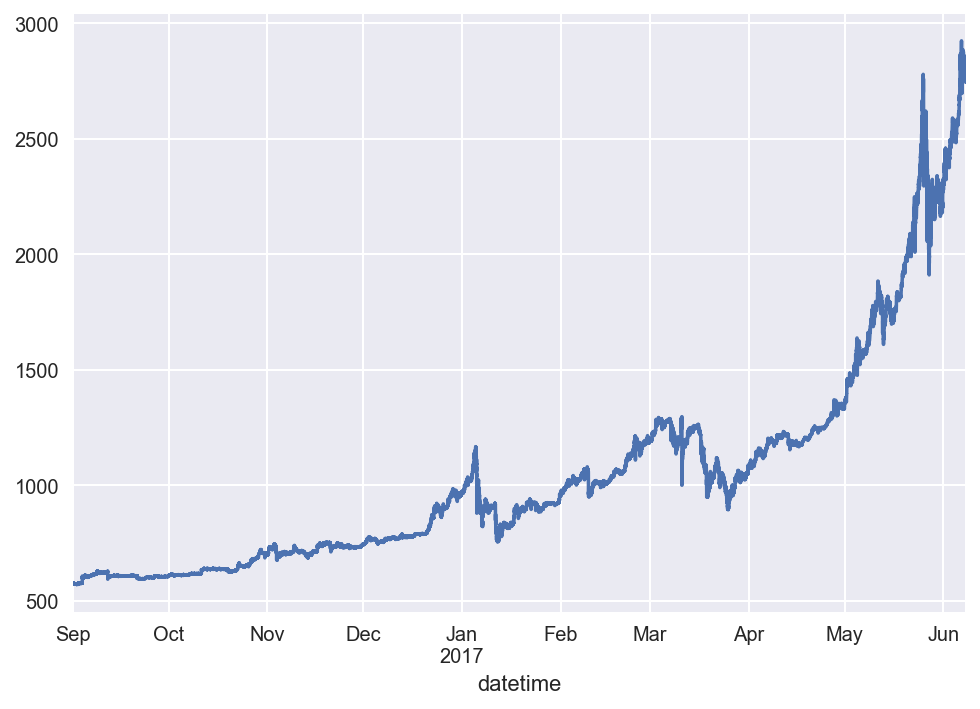

In [106]:
gemini_5min["2016-09-01":"2017-06-07"].plot()

let's put all seven exchanges in a single dataframe

In [229]:
prices_exchanges = pd.concat([
    gdax_5min["2016-09-01":"2017-06-07"].tz_localize(None).rename("gdax"),
    kraken_5min["2016-09-01":"2017-06-07"].rename("kraken"),
    bitmex_5min["2016-09-01":"2017-06-07"].rename("bitmex"),
    bitfinex_5min["2016-09-01":"2017-06-07"].rename("bitfinex"),
    cex_5min["2016-09-01":"2017-06-07"].rename("cex"),
    gemini_5min["2016-09-01":"2017-06-07"].rename("gemini")
], axis=1).dropna()

In [108]:
prices_exchanges.head()

,gdax,kraken,bitmex,bitfinex,cex,hitbtc,gemini
datetime,,,,,,,
2016-09-01 01:00:00,572.66,572.890,573.19,574.72,585.820,574.56,574.38
2016-09-01 01:20:00,572.35,574.465,574.15,574.53,585.770,570.31,573.99
2016-09-01 01:25:00,572.51,572.650,574.20,574.20,585.560,574.36,574.04
2016-09-01 01:45:00,572.40,572.040,573.95,574.85,586.200,572.75,574.38
2016-09-01 03:55:00,572.99,574.210,573.80,576.44,584.923,572.48,577.34


In [109]:
prices_exchanges.tail()

,gdax,kraken,bitmex,bitfinex,cex,hitbtc,gemini
datetime,,,,,,,
2017-06-07 18:20:00,2795.99,2802.447,2805.9,2770.000000,2847.0011,2789.23,2805.20
2017-06-07 18:25:00,2803.99,2779.997,2817.5,2717.302083,2811.1352,2742.86,2774.42
2017-06-07 18:30:00,2802.06,2783.480,2812.3,2738.900000,2826.6264,2730.00,2765.06
2017-06-07 18:35:00,2802.26,2771.984,2809.0,2733.100000,2804.0005,2736.89,2768.91
2017-06-07 18:40:00,2802.01,2780.019,2806.8,2755.700000,2825.9999,2748.86,2781.90


In [230]:
prices_exchanges.count() # hitbtc had too many NaNs, so it was removed (with it there were 14889 observations)

gdax        44842
kraken      44842
bitmex      44842
bitfinex    44842
cex         44842
gemini      44842
dtype: int64

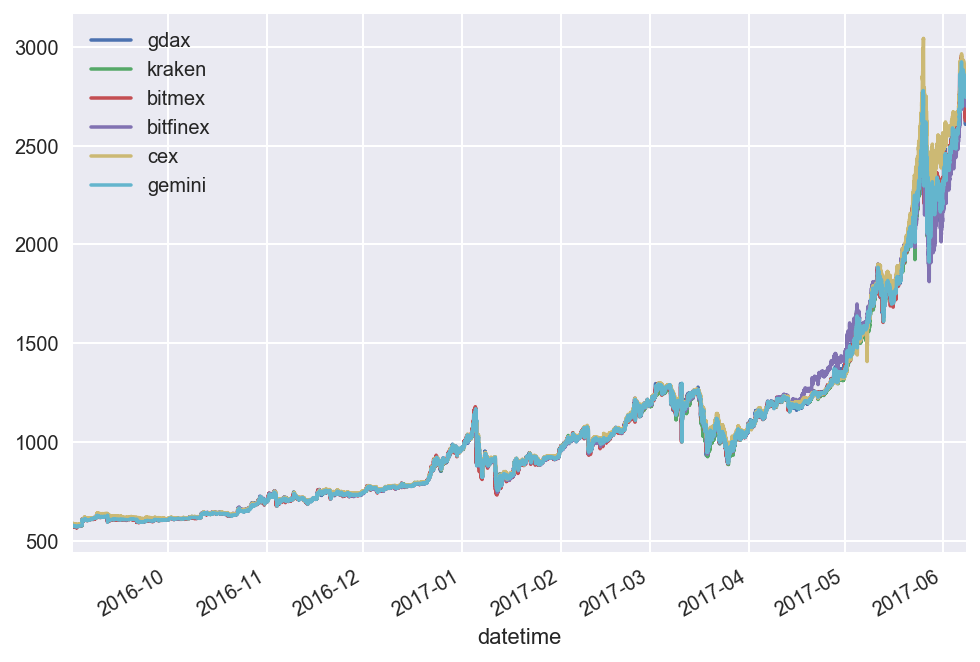

In [231]:
prices_exchanges.plot()

In [232]:
log_prices_exchanges = pd.DataFrame()
for column in prices_exchanges.columns:
    log_prices_exchanges[column] = np.log(prices_exchanges[column])

In [233]:
log_prices_exchanges.head()

,gdax,kraken,bitmex,bitfinex,cex,gemini
datetime,,,,,,
2016-09-01 01:00:00,6.350292,6.350694,6.351217,6.353883,6.373013,6.353291
2016-09-01 01:20:00,6.349751,6.353439,6.352891,6.353552,6.372927,6.352612
2016-09-01 01:25:00,6.350030,6.350275,6.352978,6.352978,6.372569,6.352699
2016-09-01 01:45:00,6.349838,6.349209,6.352542,6.354109,6.373661,6.353291
2016-09-01 03:05:00,6.350676,6.353030,6.353326,6.356333,6.375565,6.358431


In [234]:
log_prices_exchanges.tail()

,gdax,kraken,bitmex,bitfinex,cex,gemini
datetime,,,,,,
2017-06-07 23:35:00,7.906982,7.926603,7.902044,7.915312,7.945611,7.924796
2017-06-07 23:40:00,7.908240,7.923446,7.902487,7.912496,7.950333,7.924043
2017-06-07 23:45:00,7.904892,7.922524,7.896292,7.908387,7.945952,7.921978
2017-06-07 23:50:00,7.901007,7.918261,7.897408,7.904482,7.941449,7.919349
2017-06-07 23:55:00,7.895674,7.914924,7.888934,7.901081,7.938933,7.917223


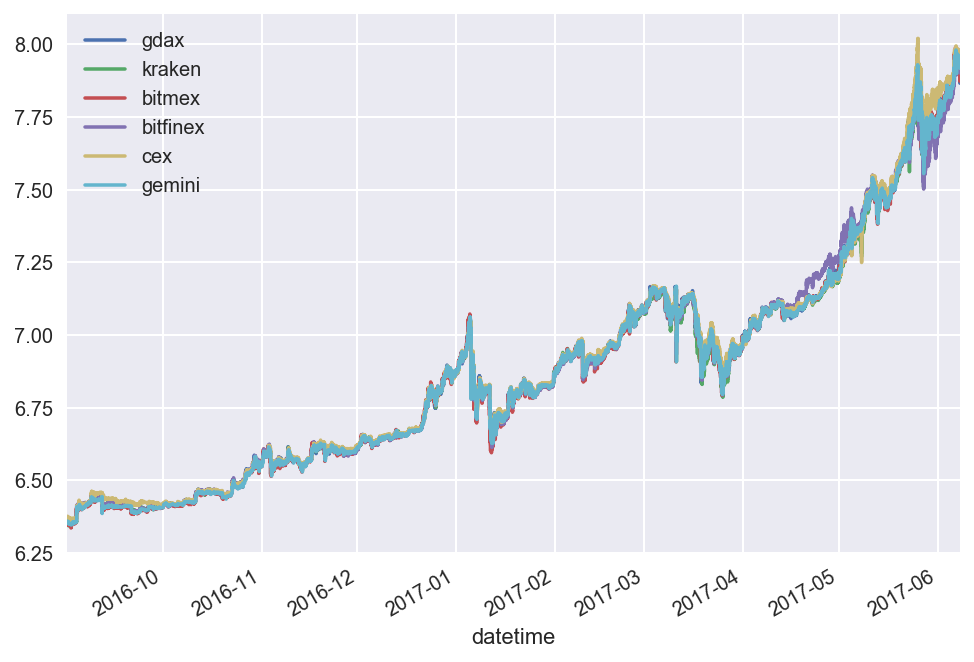

In [235]:
log_prices_exchanges.plot()

In [236]:
log_returns_exchanges = pd.DataFrame()
for column in log_prices_exchanges.columns:
    log_returns_exchanges[column] = log_prices_exchanges[column] - log_prices_exchanges[column].shift(1)

In [237]:
log_returns_exchanges.head()

,gdax,kraken,bitmex,bitfinex,cex,gemini
datetime,,,,,,
2016-09-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01 01:20:00,-0.000541,0.002745,0.001673,-0.000331,-0.000085,-0.000679
2016-09-01 01:25:00,0.000280,-0.003164,0.000087,-0.000575,-0.000359,0.000087
2016-09-01 01:45:00,-0.000192,-0.001066,-0.000435,0.001131,0.001092,0.000592
2016-09-01 03:05:00,0.000838,0.003821,0.000784,0.002224,0.001904,0.005140


In [238]:
log_returns_exchanges.tail()

,gdax,kraken,bitmex,bitfinex,cex,gemini
datetime,,,,,,
2017-06-07 23:35:00,0.000659,7.220217e-07,0.001444,0.001096,-0.002758,-0.001583
2017-06-07 23:40:00,0.001258,-3.156600e-03,0.000444,-0.002815,0.004723,-0.000753
2017-06-07 23:45:00,-0.003348,-9.228270e-04,-0.006195,-0.004109,-0.004381,-0.002065
2017-06-07 23:50:00,-0.003885,-4.262851e-03,0.001116,-0.003905,-0.004504,-0.002629
2017-06-07 23:55:00,-0.005333,-3.336845e-03,-0.008474,-0.003401,-0.002516,-0.002126


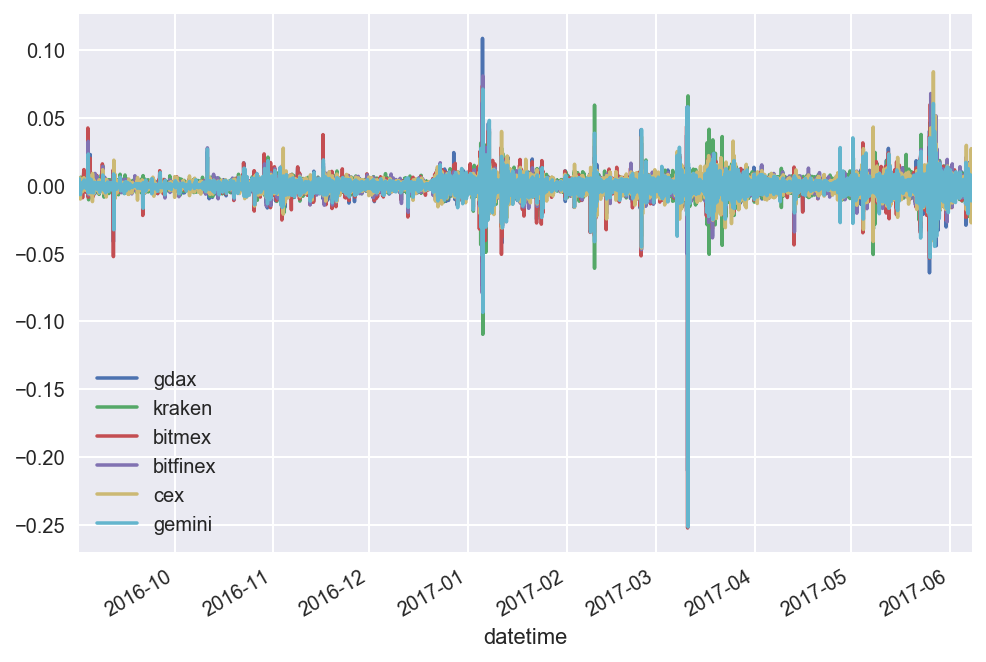

In [345]:
log_returns_exchanges.plot()

In [224]:
venues = ["gdax", "kraken", "bitmex", "bitfinex", "cex", "gemini"]

In [240]:
volumes = {
    venue: eval(venue).set_index("datetime")["2016-09-01":"2017-06-07"]["volume"].sum()
    for venue in venues
}

volumes

{'bitfinex': 5218208912.2067041,
 'bitmex': 6813604723.0,
 'cex': 221781276.73384082,
 'gdax': 2879218466.3229761,
 'gemini': 1429969908.9774709,
 'kraken': 1012178315.4690943}

In [241]:
trade_counts = {
    venue: eval(venue).set_index("datetime")["2016-09-01":"2017-06-07"]["volume"].count()
    for venue in venues
}

trade_counts

{'bitfinex': 4065108,
 'bitmex': 3876399,
 'cex': 996926,
 'gdax': 5604766,
 'gemini': 830527,
 'kraken': 1257850}

In [242]:
total_volume = sum(volumes.values())
total_trade_count = sum(trade_counts.values())

weights = {
    venue: 0.5 * (volumes[venue] / total_volume) + 0.5 * (trade_counts[venue] / total_trade_count)
    for venue in venues
}

weights

{'bitfinex': 0.27066631689735465,
 'bitmex': 0.31038141797057983,
 'cex': 0.036280462584198155,
 'gdax': 0.25041025274655287,
 'gemini': 0.065650400282135118,
 'kraken': 0.066611149519179347}

In [243]:
def normalize_weights(venue):
    left_share = 1 - weights[venue]
    return {item: weights[item] / left_share for item in weights if item != venue}

def log_return_market(venue, venues, weights):
    other_venues = [other_venue for other_venue in venues if other_venue != venue]
    normalized_weights = normalize_weights(venue)
    
    for index, row in log_returns_exchanges.iterrows():
        value = sum([row[other_venue] * normalized_weights[other_venue] for other_venue in other_venues])
        log_returns_markets.set_value(index, venue, value)

In [244]:
log_returns_markets = pd.DataFrame()

for venue in venues:
    log_return_market(venue, venues, weights)

In [245]:
log_returns_markets.head()

,gdax,kraken,bitmex,bitfinex,cex,gemini
2016-09-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01 01:20:00,0.000754,0.000264,-0.000130,0.000712,0.000449,0.000507
2016-09-01 01:25:00,-0.000462,-0.000070,-0.000440,-0.000166,-0.000273,-0.000302
2016-09-01 01:45:00,0.000238,0.000216,0.000385,-0.000241,0.000094,0.000098
2016-09-01 03:05:00,0.002010,0.001566,0.002136,0.001528,0.001709,0.001476


In [246]:
log_returns_markets.tail()

,gdax,kraken,bitmex,bitfinex,cex,gemini
2017-06-07 23:35:00,0.000722,0.000756,0.000374,0.000561,0.000836,0.000867
2017-06-07 23:40:00,-0.000951,-0.000201,-0.000776,0.000500,-0.000590,-0.000373
2017-06-07 23:45:00,-0.004524,-0.004465,-0.003345,-0.004274,-0.004224,-0.004382
2017-06-07 23:50:00,-0.001775,-0.002164,-0.003842,-0.001709,-0.002221,-0.002280
2017-06-07 23:55:00,-0.005341,-0.005482,-0.003928,-0.006058,-0.005445,-0.005565


serial covariances

In [247]:
covs = {"self": {}, "market": {}}

covs["self"]["lag_0"] = {
    venue: log_returns_exchanges[venue].cov(log_returns_exchanges[venue].shift(0))
    for venue in venues
}

covs["self"]["lag_1"] = {
    venue: log_returns_exchanges[venue].cov(log_returns_exchanges[venue].shift(1))
    for venue in venues
}

covs["self"]["lag_2"] = {
    venue: log_returns_exchanges[venue].cov(log_returns_exchanges[venue].shift(2))
    for venue in venues
}

covs["market"]["lag_0"] = {
    venue: log_returns_exchanges[venue].cov(log_returns_markets[venue].shift(0))
    for venue in venues
}

covs["market"]["lag_1"] = {
    venue: log_returns_exchanges[venue].cov(log_returns_markets[venue].shift(1))
    for venue in venues
}

covs["market"]["lag_2"] = {
    venue: log_returns_exchanges[venue].cov(log_returns_markets[venue].shift(2))
    for venue in venues
}

covs

{'market': {'lag_0': {'bitfinex': 1.4467605277161853e-06,
   'bitmex': 3.1428376158065075e-06,
   'cex': 2.1376709196909933e-06,
   'gdax': 3.5254835190429484e-06,
   'gemini': 2.4668063499251305e-06,
   'kraken': 2.5380249147351323e-06},
  'lag_1': {'bitfinex': -3.8627781728752274e-08,
   'bitmex': -3.1789709276119288e-07,
   'cex': 7.63906472702367e-07,
   'gdax': 3.8728733853698083e-07,
   'gemini': 5.9783412881474389e-07,
   'kraken': 7.4727697441247756e-07},
  'lag_2': {'bitfinex': -1.7810443902310525e-07,
   'bitmex': -1.5786781660543106e-07,
   'cex': -7.734255476817323e-08,
   'gdax': -2.620232529714163e-07,
   'gemini': -1.8193203369852915e-07,
   'kraken': -2.8532941430813896e-07}},
 'self': {'lag_0': {'bitfinex': 1.0389099049073036e-05,
   'bitmex': 1.2037495560171883e-05,
   'cex': 1.1448678295801489e-05,
   'gdax': 1.0336680332333239e-05,
   'gemini': 9.5932427840064231e-06,
   'kraken': 1.5113381124574685e-05},
  'lag_1': {'bitfinex': -3.9399663496620299e-07,
   'bitmex':

In [248]:
total_returns = pd.DataFrame()
for index, row in log_returns_exchanges.iterrows():
    value = sum([row[venue] * weights[venue] for venue in venues])
    total_returns.set_value(index, "total", value)

In [249]:
total_var = total_returns.var().total

In [250]:
coef_matrix = np.array([
    [1.999, 2.001, 0, 0], # a hack to make the optimization work with a degenerate matrix
    [1, 1, 0, 0],
    [1, 0, 1, 2],
    [0, 0, -1, -1]
])

psi = {"self": {}, "market": {}}
omega = {"self": {}, "market": {}}

for venue in venues:
    eqs = np.array([
        covs["self"]["lag_0"][venue] - total_var,
        - covs["self"]["lag_2"][venue] - covs["self"]["lag_1"][venue],
        - total_var + covs["market"]["lag_0"][venue],
        covs["market"]["lag_1"][venue] + covs["market"]["lag_2"][venue]
    ])

    sol = np.linalg.solve(coef_matrix, eqs)
    
    psi["self"][venue] = sol[0]
    psi["market"][venue] = sol[2]
    
    omega["self"][venue] = sol[1]
    omega["market"][venue] = sol[3]
    

In [251]:
psi

{'market': {'bitfinex': -0.0019615361822460432,
  'bitmex': -0.0021035496148666976,
  'cex': -0.0011053122891583262,
  'gdax': -0.0018624953527241765,
  'gemini': -0.0017278871488088108,
  'kraken': -0.0018126936834658562},
 'self': {'bitfinex': -0.0019652191998229813,
  'bitmex': -0.0021060546207327742,
  'cex': -0.0011064978040659166,
  'gdax': -0.0018634156546971522,
  'gemini': -0.0017292848519318035,
  'kraken': -0.0018139280770940621}}

In [336]:
-0.001965 == -1.965e-03

True

In [252]:
omega

{'market': {'bitfinex': 0.001961752914466795,
  'bitmex': 0.0021040253797760641,
  'cex': 0.001104625725240392,
  'gdax': 0.0018623700886386109,
  'gemini': 0.0017274712467136946,
  'kraken': 0.0018122317359057518},
 'self': {'bitfinex': 0.0019660999329495568,
  'bitmex': 0.0021076183751833275,
  'cex': 0.0011087663543030582,
  'gdax': 0.0018643719442322795,
  'gemini': 0.001730003672230151,
  'kraken': 0.0018173209862930814}}

In [302]:
info_shares = {venue: weights[venue] * (1 + psi["self"][venue] / total_var) for venue in venues}

In [304]:
info_shares

{'bitfinex': 0.25934001544339014,
 'bitmex': 0.29646241114112265,
 'cex': 0.035425659113661065,
 'gdax': 0.24047440905012368,
 'gemini': 0.063233009731287274,
 'kraken': 0.064038326598333056}

In [253]:
leaders_followers = pd.DataFrame(
    {
        venue: [
            log_returns_exchanges[venue].corr(log_returns_markets[venue].shift(i))
            for i in range(-30, 30)
        ]
        for venue in venues
    },
    index=range(-30, 30)
)

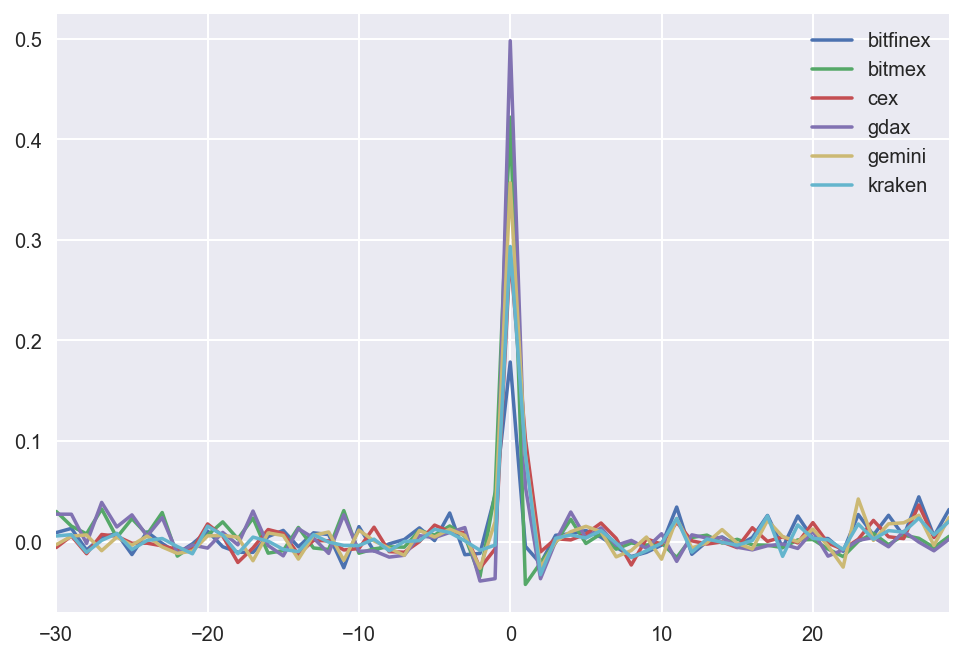

In [346]:
leaders_followers.plot()

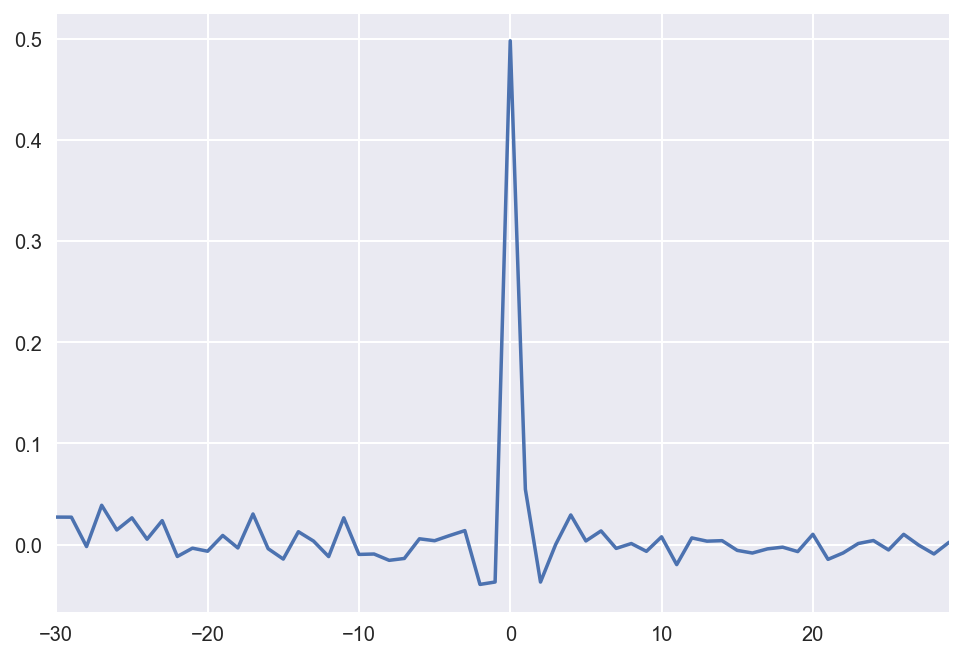

In [255]:
leaders_followers["gdax"].plot()

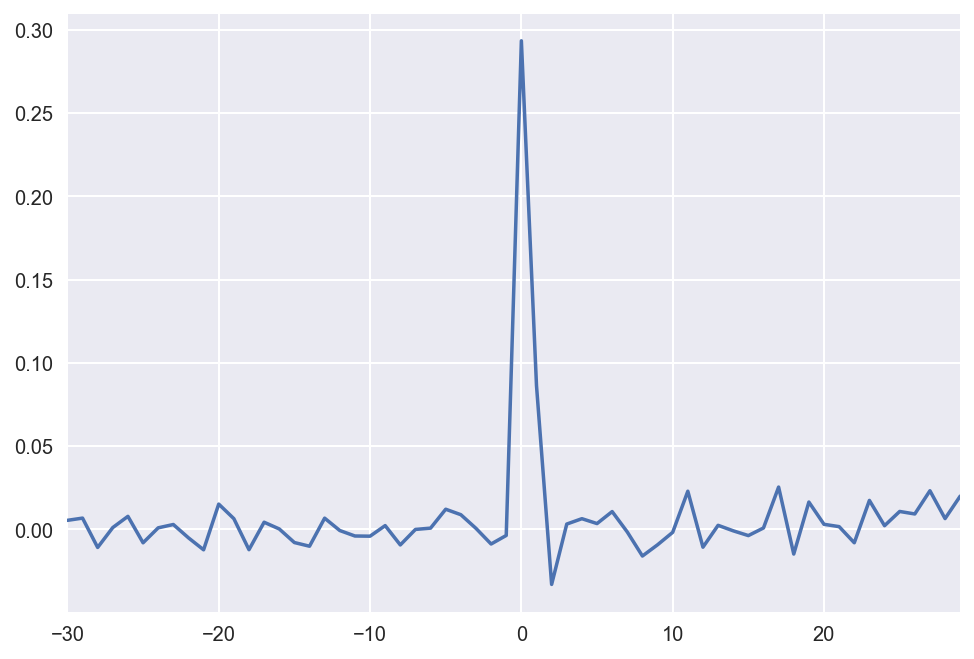

In [256]:
leaders_followers["kraken"].plot()

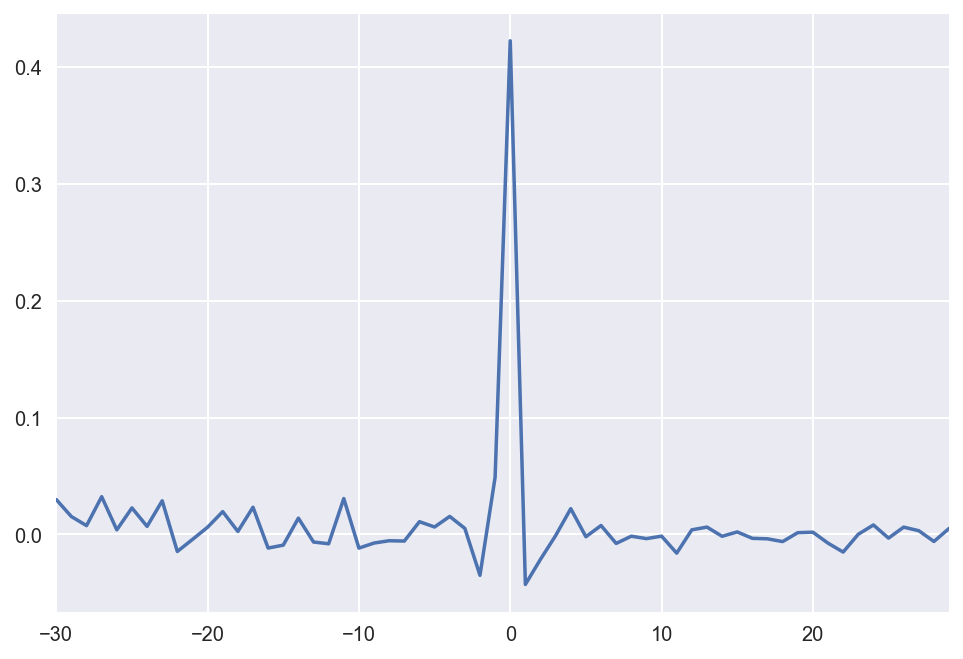

In [257]:
leaders_followers["bitmex"].plot()

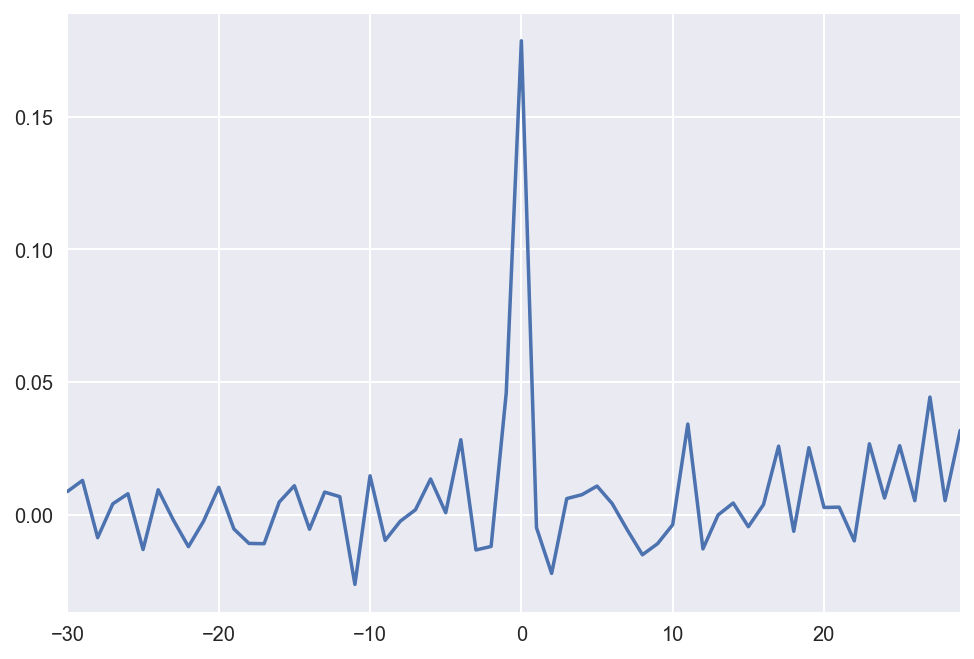

In [258]:
leaders_followers["bitfinex"].plot()

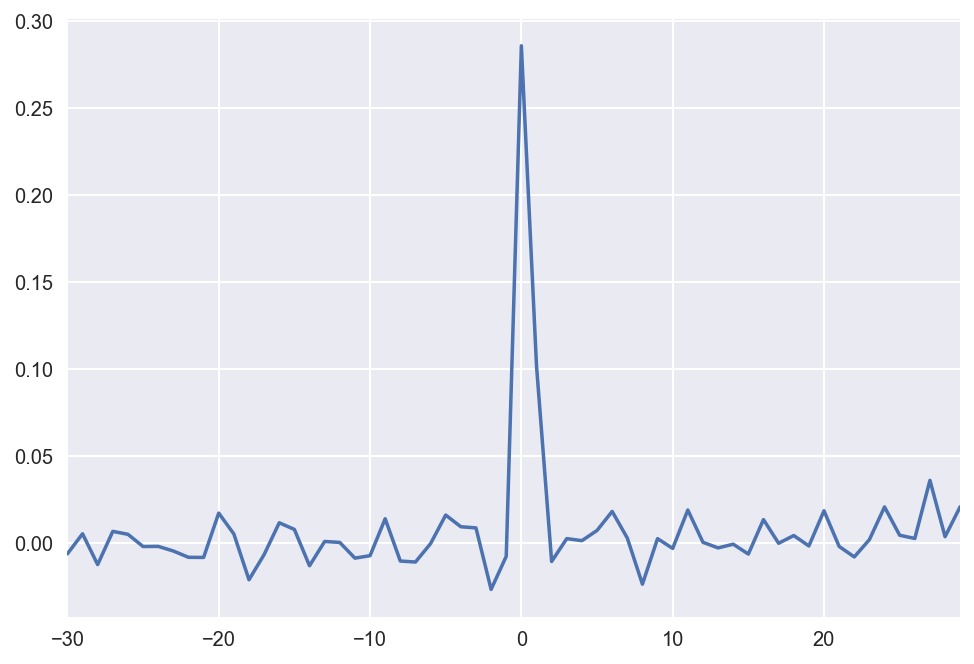

In [259]:
leaders_followers["cex"].plot()

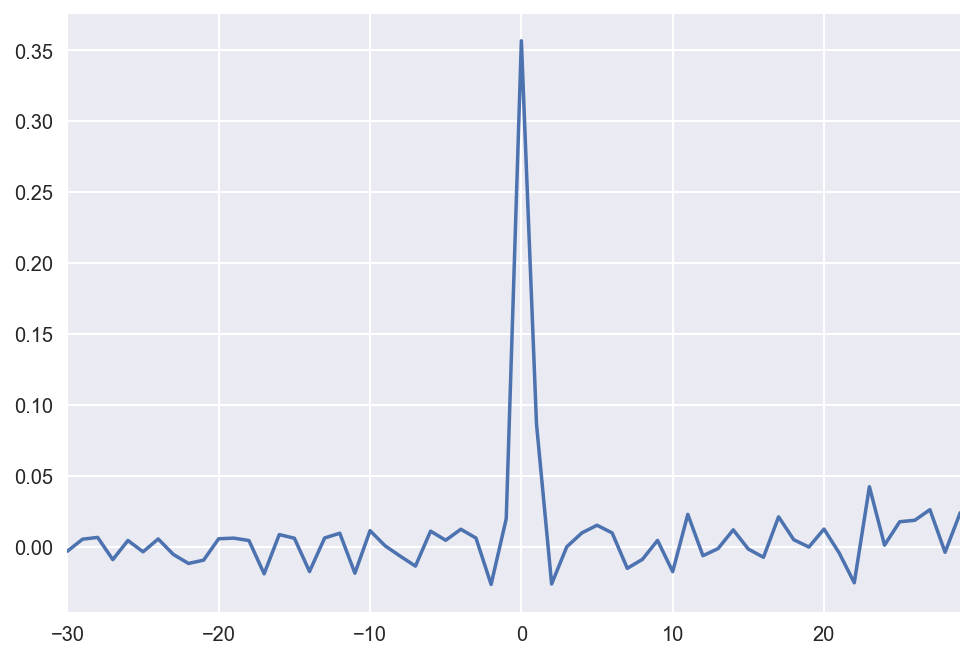

In [260]:
leaders_followers["gemini"].plot()

In [158]:
# find information shares

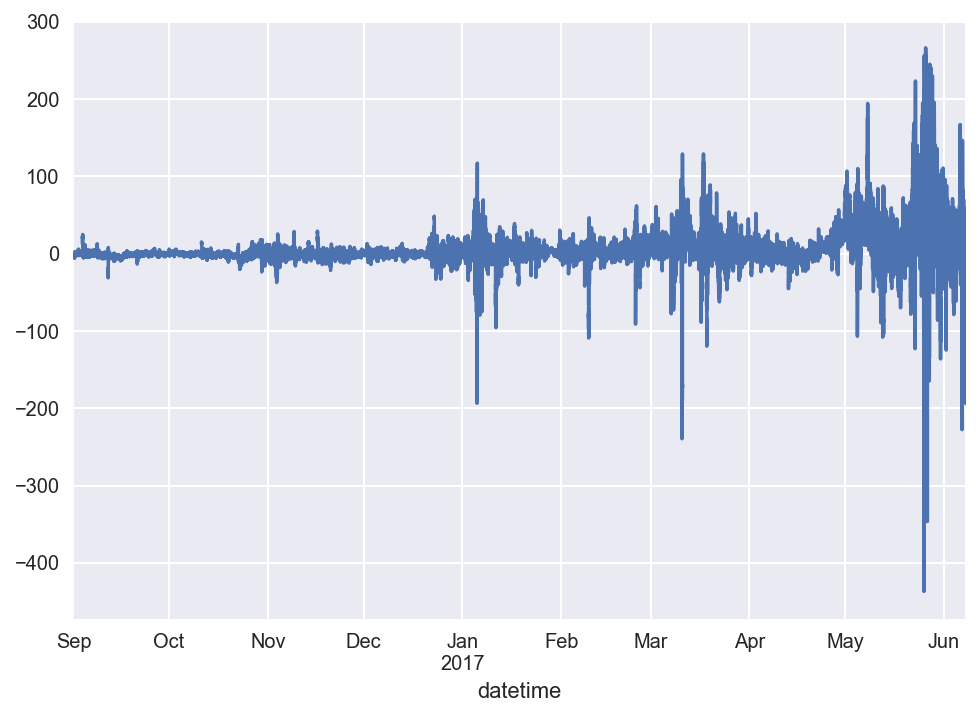

In [261]:
(gdax_5min["2016-09-01":"2017-06-07"].tz_localize(None) - kraken_5min["2016-09-01":"2017-06-07"]).plot()

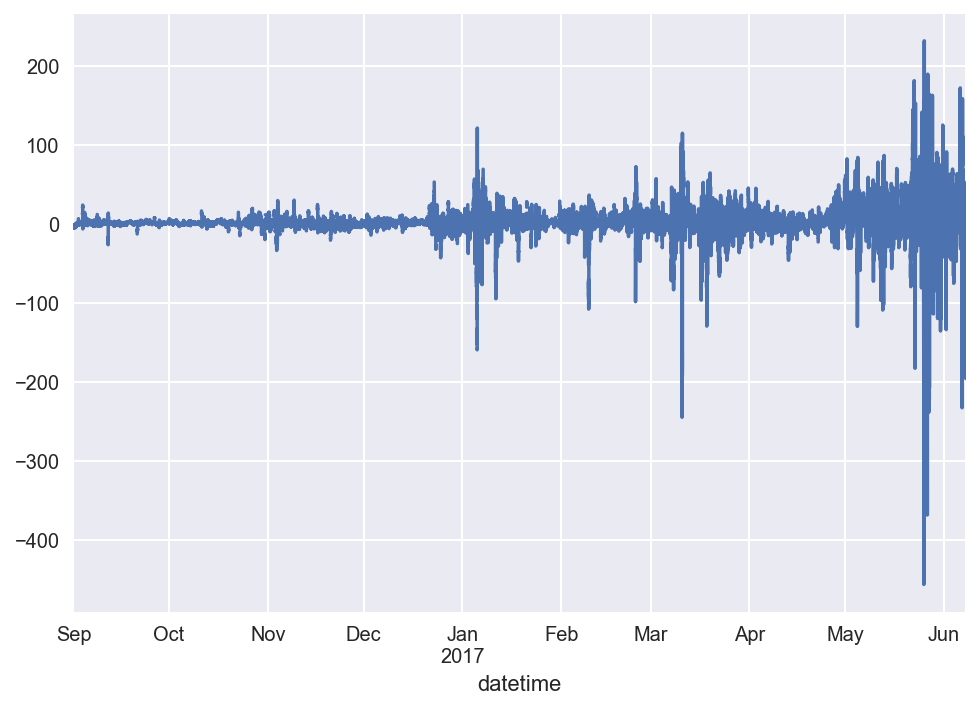

In [262]:
(gdax_5min["2016-09-01":"2017-06-07"].tz_localize(None) - gemini_5min["2016-09-01":"2017-06-07"]).plot()

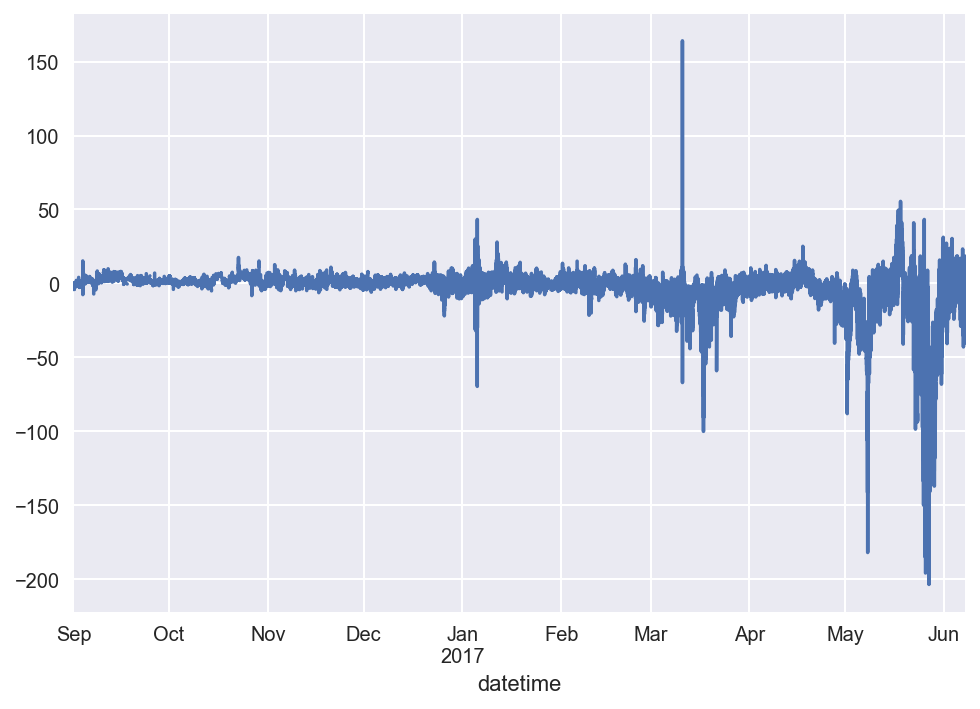

In [263]:
(kraken_5min["2016-09-01":"2017-06-07"] - gemini_5min["2016-09-01":"2017-06-07"]).plot()

the spread doesn't seem to be particularly stationary

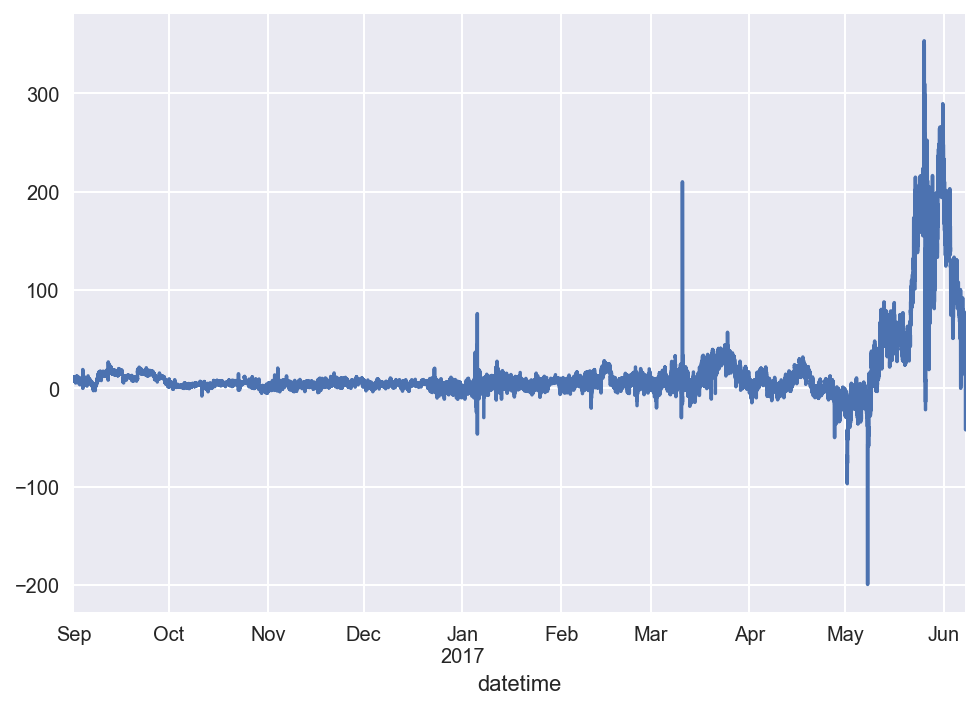

In [264]:
(cex_5min["2016-09-01":"2017-06-07"] - gemini_5min["2016-09-01":"2017-06-07"]).plot()